In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data-final.csv', delimiter = '\t')

In [3]:
x = df[df.columns[0:50]]

In [4]:
pd.set_option('display.max_columns', None)
x

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513052,1.0,3.0,4.0,3.0,4.0,2.0,2.0,2.0,2.0,5.0,1.0,4.0,4.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,4.0,4.0,1.0,5.0,2.0,3.0,4.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,3.0,5.0,4.0,4.0,3.0
513053,3.0,2.0,2.0,4.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,4.0,1.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,3.0,4.0,3.0,4.0,2.0,4.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
513054,3.0,2.0,5.0,2.0,4.0,2.0,2.0,2.0,4.0,1.0,4.0,4.0,4.0,5.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,4.0,1.0,5.0,2.0,4.0,2.0,4.0,5.0,4.0,5.0,2.0,5.0,1.0,4.0,2.0,5.0,2.0,5.0,5.0,2.0,2.0,1.0,4.0,4.0,2.0,4.0,1.0,4.0,4.0
513055,1.0,3.0,4.0,4.0,2.0,4.0,2.0,4.0,2.0,5.0,1.0,4.0,2.0,5.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,4.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,4.0,5.0,3.0,1.0,4.0,3.0,5.0,3.0,2.0,5.0,1.0,5.0,2.0,5.0,1.0,5.0,4.0,5.0,5.0


In [5]:
x = x.fillna(0)

In [6]:
kmeans = MiniBatchKMeans(n_clusters = 10, random_state = 0, batch_size = 100, max_iter = 100).fit(x)

In [7]:
List = []
for x in range(len(kmeans.cluster_centers_)):
  List.append(kmeans.cluster_centers_[x])

In [8]:
allScores = {}
index = 0

for x in List:
  personalityTrait = {}
  personalityTrait['extroversion_score'] = List[index][0] - List[index][1] + List[index][2] - List[index][3] + List[index][4] - List[index][5] + List[index][6] - List[index][7] + List[index][8] - List[index][9]
  personalityTrait['neuroticism_score'] = List[index][0] - List[index][1] + List[index][2] - List[index][3] + List[index][4] + List[index][5] + List[index][6] + List[index][7] + List[index][8] + List[index][9]
  personalityTrait['agreeableness_score'] = -List[index][0] + List[index][1] - List[index][2] + List[index][3] - List[index][4] - List[index][5] + List[index][6] - List[index][7] + List[index][8] + List[index][9]
  personalityTrait['conscientiousness_score'] = List[index][0] - List[index][1] + List[index][2] - List[index][3] + List[index][4] - List[index][5] + List[index][6] - List[index][7] + List[index][8] + List[index][9]
  personalityTrait['openness_score'] = List[index][0] - List[index][1] + List[index][2] - List[index][3] + List[index][4] - List[index][5] + List[index][6] + List[index][7] + List[index][8] + List[index][9]
  allScores[str(index+1)] = personalityTrait
  index += 1

In [10]:
allExtroversion = []
allNeuroticism = []
allAgreeableness = []
allConscientiousness = []
allOpenness = []

for personalityType, personalityTrait in allScores.items():
  allExtroversion.append(personalityTrait['extroversion_score'])
  allNeuroticism.append(personalityTrait['neuroticism_score'])
  allAgreeableness.append(personalityTrait['agreeableness_score'])
  allConscientiousness.append(personalityTrait['conscientiousness_score'])
  allOpenness.append(personalityTrait['openness_score'])

In [11]:
allExtroversionNormalized = (allExtroversion - min(allExtroversion)) / (max(allExtroversion) - min(allExtroversion))
allNeuroticismNormalized = (allNeuroticism - min(allNeuroticism)) / (max(allNeuroticism) - min(allNeuroticism))
allAgreeablenessNormalized = (allAgreeableness - min(allAgreeableness)) / (max(allAgreeableness) - min(allAgreeableness))
allConscientiousnessNormalized = (allConscientiousness - min(allConscientiousness)) / (max(allConscientiousness) - min(allConscientiousness))
allOpennessNormalized = (allOpenness - min(allOpenness)) / (max(allOpenness) - min(allOpenness))

In [12]:
allScoresNormalized = {}

index = 0
for personalityType, personalityTrait in allScores.items():
  normalizedPersonalityTrait = {}
  normalizedPersonalityTrait['extroversion_score'] = allExtroversionNormalized[index]
  normalizedPersonalityTrait['neuroticism_score'] = allNeuroticismNormalized[index]
  normalizedPersonalityTrait['agreeableness_score'] = allAgreeablenessNormalized[index]
  normalizedPersonalityTrait['conscientiousness_score'] = allConscientiousnessNormalized[index]
  normalizedPersonalityTrait['openness_score'] = allOpennessNormalized[index]
  
  allScoresNormalized[personalityType] = normalizedPersonalityTrait
  index += 1

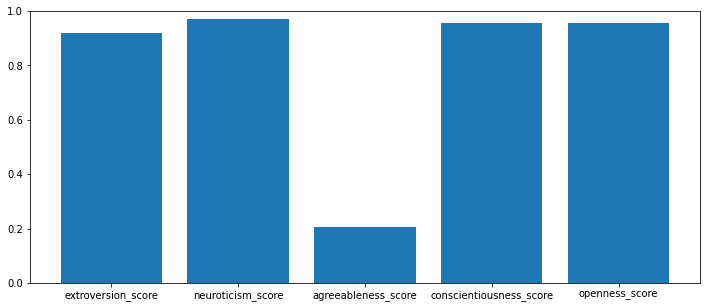

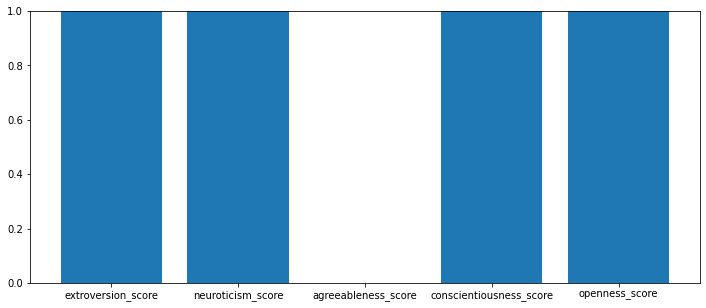

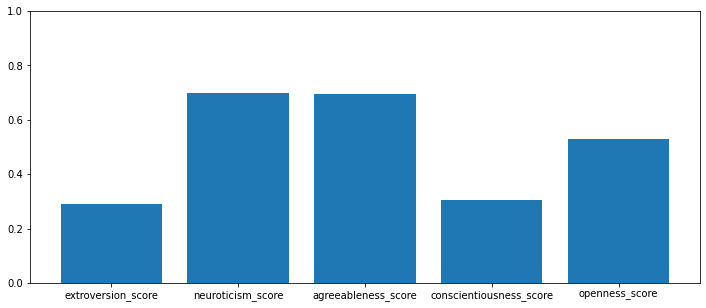

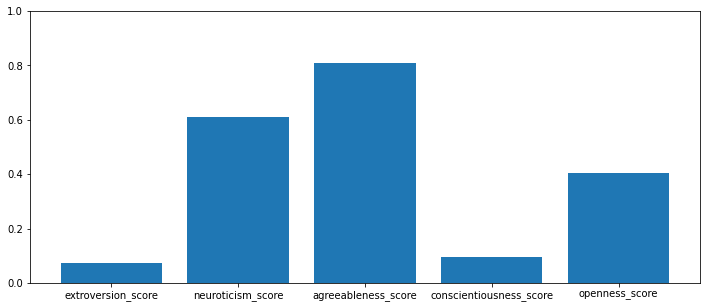

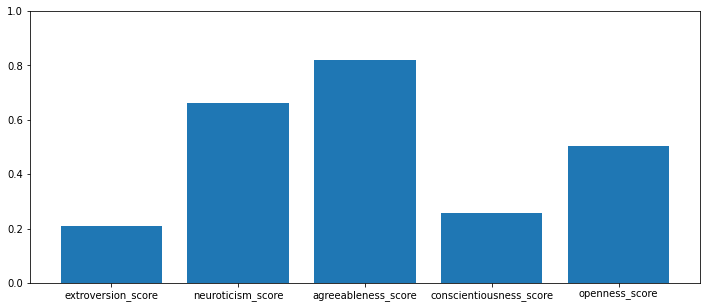

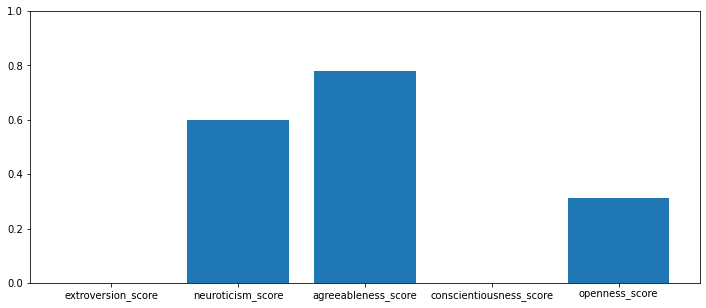

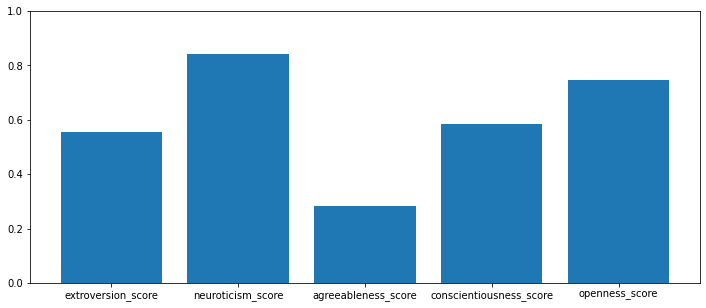

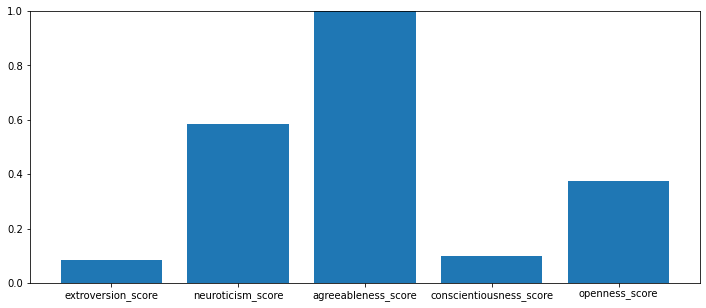

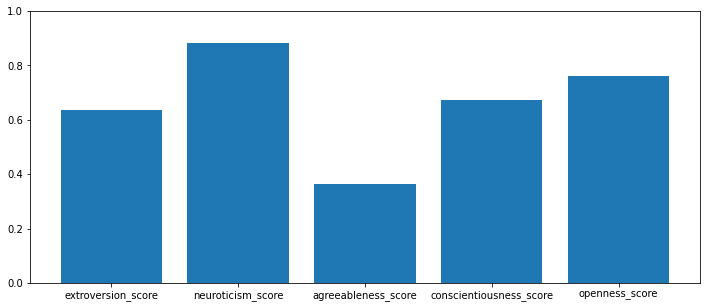

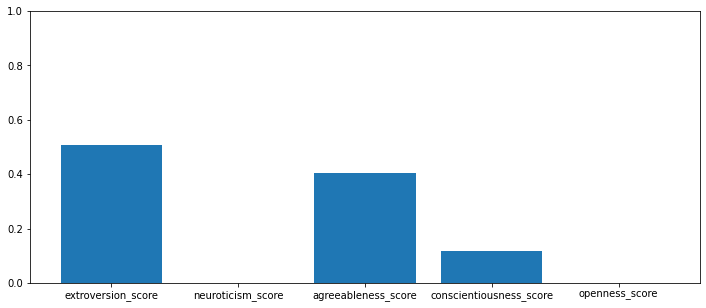

In [21]:
for x in range(10):
  plt.figure(figsize = (12,5))
  plt.ylim(0, 1)
  plt.bar(list(allScoresNormalized[str(x + 1)].keys()), allScoresNormalized[str(x + 1)].values())
  plt.show()